In [20]:
def  discretized_flux(x_pos = None, y_pos = None, vx = None, vy = None, shape = "rectangle", a = 100):
    import numpy as np
    """
    discretized_flux is a method to get the discretized ice flux through glacial valley assuming the valley takes on a given shape
    currently this is setup to handle a rectangular shaped valley, and an ellipse shaped valley. further development could include parabolic/ hyperbolic shaped valleys
    for each bin, the area will be multiplied by the velocity of the corresponding cell in the velocity raster to get the flux through each bin
    if shape == 'rectangle':
        treat each bin as a rectangle of height a, and calculate the flux through each bin
    elif shape == 'ellipse':
        treat each bin as a rectangular section of an ellipse with major axis apex height, a
        to get the height each bin we'll use the parametric equations for an ellipse:
        x = b * \cos t = (1/2) * w cos(t), where w is the valley width and t ranges from 0 to 2 pi radians
        t = cos^{-1}(2x/w)
        y = a * sin(t)
        y = a * sin[cos^{-1}(2x/w)]
        the flux through each bin is then:
        f = A * v
        f = x * y * v
    the x-position of each rectangular bin will be taken from the distance between points, such that x = 0 is at the center of the valley
    inputs:
        x_pos: np.ndarray, x-coordinates
        v_pos: np.ndarray, y-coordinates
        vx: rasterio dataset, x velocity components
        vy: rasterio dataset, y velocity components
        shape: str, shape type (either rectangle or ellipse)
        a: float, valley depth
    outputs:
        flux: np.ndarray, discretized ice flux
    author:
        brandon s. tober, 20220715
    """
    if not isinstance(x_pos, np.ndarray) or not isinstance(y_pos, np.ndarray):
        print("x_pos, and y_pos must both be of type np.ndarray")
        return None
    if x_pos.shape != y_pos.shape:
        print("x_pos, and y_pos must both be of same shape")
        return None
    if shape not in ["ellipse", "rectangle"]:
        print(f"Unsupported shape : {shape}")
        return None
#     if not check_rasters(vx_ds, vy_ds):
#         print("vx and vy rasters must be of same shape")
#         return None
    # gest distance array
    dist = euclid_dist(x_pos, y_pos)
    # center distance array
    dist = dist - (dist[-1]/2)
    # get total valley width
    w = dist[-1] - dist[0]
    # get distance from center of each bin
    # dist = (dist[:-1]+dist[1:])/2
    if shape=="ellipse":
        # get height of each rectangular bin
        y = a * np.sin( np.arccos(2 * dist / w))
        # take absolute value of bin heights
        y = np.abs(y)
    elif shape =="rectangle":
        y = np.repeat(a, dist.shape)
    # since se need to multiply dx and dy by the bin height, we need to get bin heights in between our coordinates
    y_tmp = (y[:-1]+y[1:])/2
    # get delta x and delta y between each cell    
    dx = np.diff(x_pos)
    dy = np.diff(y_pos)
    # get centroid coordinates between each set of points - this is where we'll sample vx and vy
    xpos_tmp = (x_pos[:-1]+x_pos[1:])/2
    ypos_tmp = (y_pos[:-1]+y_pos[1:])/2
    coords = [(x,y) for x, y in zip(xpos_tmp, ypos_tmp)]
    # sample vx and vy at these centoid coordinates
    vx = np.asarray([x[0] for x in vx_ds.sample(coords)])
    vy = np.asarray([x[0] for x in vy_ds.sample(coords)])
    # get area through each bin per year using normal velocity
    area_flux =  np.abs((vx*dy) - (vy*dx))
    # get flux for each cell
    flux = area_flux * y_tmp
    return flux, dist, y

In [ ]:
def euclid_distance

In [21]:
# set paramaters for Sit Kusa
import numpy as np

z = 350 # bed depth from sIPR
shape = 'ellipse'
xs = [1,2,3]
ys = [1,2,3]
xs = np.array(xs); ys = np.array(ys)

velocity_20200510_20200515_200m_S2.tif


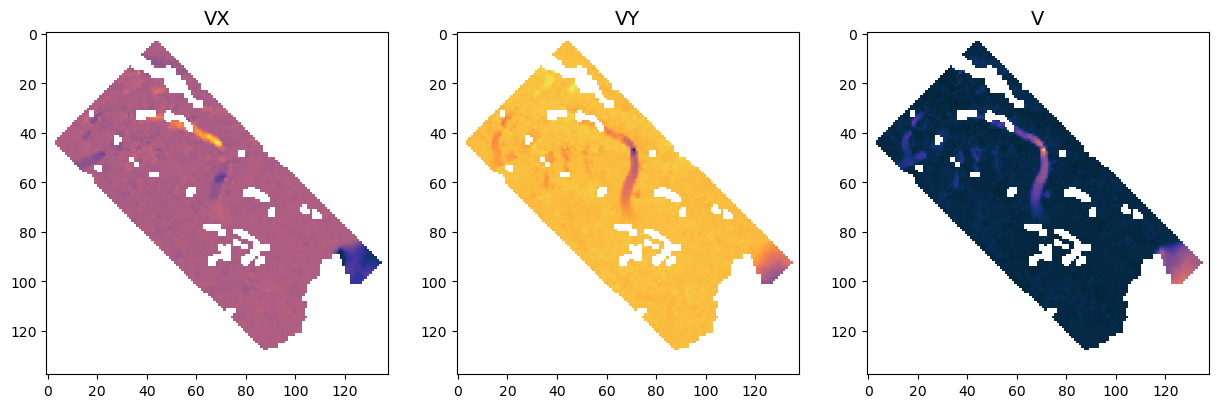

In [22]:
import rasterio as rio
import os
import matplotlib.pyplot as plt
import cmocean

# path to output velocity data #########
basepath = '/Users/jukesliu/Documents/TURNER/DATA/VELOCITY_MAPS/output_autoRIFT/'
ds1 = '20200510'
ds2 = '20200515'
chipsize = '200m'
sat = 'S2'
filename = 'velocity_'+ds1+'_'+ds2+'_'+chipsize+'_'+sat+'.tif'
print(filename)
#########################################

# open the rasters using rasterio
VFILE = rio.open(basepath+file, 'r')
VX = VFILE.read(1)
VY = VFILE.read(2)
vmag = VFILE.read(3)

# dsiplay to check
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
ax1.imshow(VX, cmap=cmocean.cm.thermal); ax1.set_title('VX', fontsize=14)
ax2.imshow(VY, cmap=cmocean.cm.thermal); ax2.set_title('VY', fontsize=14)
ax3.imshow(vmag, cmap=cmocean.cm.thermal); ax3.set_title('V', fontsize=14)
plt.show()

In [23]:
discretized_flux(xs, ys, VX, VY, shape, z)

NameError: name 'euclid_dist' is not defined

In [18]:
VX.shape

(138, 138)

In [19]:
VY.shape

(138, 138)